# Reinforcement Learning 1

<div>
    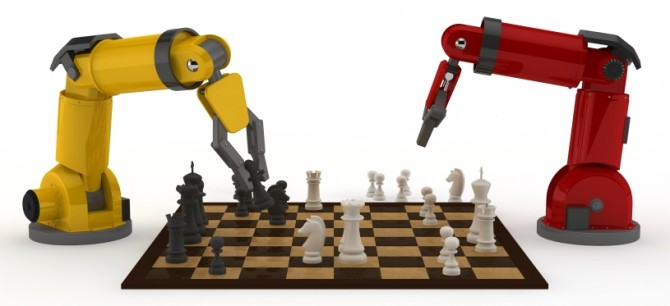
</div>

## Preliminaries

The following are important concepts in RL:

 * State $s$ (at the time moment $t$ marked as $s_t$)
 * Action $a$ (or $a_t$)
 * Policy $\pi$ (depends on the current state $a_t = \pi(s_t)$)
 * Reward $r$ (depends on the current state and action $r_t = r(s_t,a_t)$)

## Benchmarking environments

In RL environment is analogy to data in supervised learning.

### OpenAI Gym

One of the early contributions of the OpenAI company was to prepare unified resources for (back then) chaotic reinforcement learning research. They developed and published a set of open environments to benchmark RL algorithms:

 * https://github.com/openai/gym

### Gymnasium

Since OpenAI discontinued Gym development, a fork was made and the development is continued under the Gymnasium:

 * https://gymnasium.farama.org/
 
### MuJoCo

MuJoCo used to be a commercial tool for making RL environments that corresponds to the physical world. Later, MuJoCo was obtained by Google DeepMind that made it publicly available and many benchmark environments are included to the Gym/Gymnasium.

 * https://mujoco.org/

### Install Gym

Execute the following:

```shell
$ conda install -c conda-forge gym
```

#### Example: OpenAI Gym Frozen lake

See the description at the Gymnasium Web page (link above).

<div>
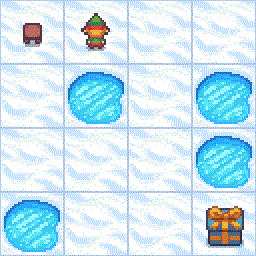
</div>

Let's import the necessary modules (Gym from OpenAI)

In [1]:
import gym
import time
import numpy as np
import matplotlib.pyplot as plt

Let's create the environment (render mode ansi to avoid graphics)

 * is_slippery defines whether the environment is deterministic or non-deterministic
 

In [2]:
# Create environment
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")
env.reset()
print(env.render())


SFFF
FHFH
FFFH
HFFG



What are the possible actions and states?

In [3]:
action_size = env.action_space.n
print("Action size: ", action_size)

state_size = env.observation_space.n
print("State size: ", state_size)

Action size:  4
State size:  16


Let's test the environment manually (observe the states and rewards)

In [4]:
done = False
env.reset()
while not done:
    print(env.render())
    action = np.random.randint(0,4) # 0:Left 1:Down 2: Right, 3: Up
    #action = int(input('0/left 1/down 2/right 3/up:'))
    new_state, reward, done, truncated, info = env.step(action)
    time.sleep(1.0)
    print('')
    print(f'Observations: S_t+1={new_state}, R_t+1={reward}, done={done}')


SFFF
FHFH
FFFH
HFFG



C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



Observations: S_t+1=1, R_t+1=0.0, done=False
  (Right)
SFFF
FHFH
FFFH
HFFG


Observations: S_t+1=1, R_t+1=0.0, done=False
  (Up)
SFFF
FHFH
FFFH
HFFG


Observations: S_t+1=2, R_t+1=0.0, done=False
  (Right)
SFFF
FHFH
FFFH
HFFG


Observations: S_t+1=6, R_t+1=0.0, done=False
  (Down)
SFFF
FHFH
FFFH
HFFG


Observations: S_t+1=7, R_t+1=0.0, done=True


## RL objective

Agent's behavior is defined by its policy $\pi(s)$ and the objective of RL is to find as good policy as possible.

## Tabular $\pi$ (discrete states and actions)

For finite states and actions the policy becomes discrete and can be encoded as a table.

### Total reward

Let's make a random Q-table.

In [5]:
qtable = np.random.rand(state_size, action_size)
print(qtable)

[[0.8991525  0.19594701 0.66856449 0.90464599]
 [0.37267032 0.27274448 0.719114   0.03791948]
 [0.81349688 0.69420302 0.7559621  0.86857542]
 [0.7446111  0.41540731 0.87565044 0.84655426]
 [0.4734167  0.92388388 0.7244817  0.40752348]
 [0.94226468 0.3446867  0.63996369 0.17081016]
 [0.98788528 0.52803068 0.09393318 0.73083504]
 [0.71274697 0.84947949 0.79141638 0.49506149]
 [0.60854256 0.10943273 0.53980575 0.31523183]
 [0.16048011 0.55074487 0.02362045 0.77905967]
 [0.17628409 0.17550663 0.74658742 0.56615763]
 [0.81539348 0.37980666 0.45166528 0.19479366]
 [0.74875654 0.94030474 0.08588245 0.21317583]
 [0.88000271 0.14298164 0.63347866 0.45272838]
 [0.5483231  0.62268284 0.96195867 0.31618612]
 [0.30399279 0.24884211 0.7745665  0.95829689]]


### Policy evaluation

A policy described by a tabular Q-table can be evaluated by simply running it for the given environment.

Evaluation function 1

In [6]:
def eval_policy(qtable_, max_steps_):
    state = env.reset()[0]
    total_reward = 0

    for step in range(max_steps_):
        action = np.argmax(qtable_[state,:])
        new_state, reward, done, truncated, info = env.step(action)
        total_reward += reward
        if done:
            break
        else:
            state = new_state
    env.close()
    return total_reward

Test the random policy

In [12]:
print(f'Total reward for random Q-table: {eval_policy(qtable,100)}')

Total reward for random Q-table: 0.0


Let's make Q-table manually (program it intuitively) - check the states from one manual run

In [13]:
qtable = np.zeros([state_size, action_size])
# start(0) -> go right (2)
qtable[0,2] = 1
# state 1 -> go right (2)
qtable[1,2] = 1 
# state 2 -> go down (1)
qtable[2,1] = 1 
# state 6 -> go down (1)
qtable[6,1] = 1 
# state 10 -> go down (1)
qtable[10,1] = 1 
# state 14 -> go right (2) -> GOAL
qtable[14,2] = 2
print(qtable)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 0.]]


Test the manually defined table

In [14]:
print(f'Total reward for manually defined Q-table: {eval_policy(qtable,100)}')

Total reward for manually defined Q-table: 1.0


### Algorithm 1: Brute force

Better found - reward: 0.0
Best reward after episode 1 is 0.0
Best reward after episode 101 is 0.0
Best reward after episode 201 is 0.0
Best reward after episode 301 is 0.0
Best reward after episode 401 is 0.0
Best reward after episode 501 is 0.0
Best reward after episode 601 is 0.0
Best reward after episode 701 is 0.0
Best reward after episode 801 is 0.0
Better found - reward: 1.0
Best reward after episode 901 is 1.0
Tot reward of the found policy: 1.0
[[0.5579254  0.92891465 0.61863327 0.65923582]
 [0.28363293 0.63392557 0.77175563 0.07723517]
 [0.84347562 0.63880435 0.82735975 0.16090887]
 [0.3349581  0.59071338 0.65508232 0.56194301]
 [0.18268542 0.50571731 0.44854243 0.45057015]
 [0.1515347  0.94839888 0.65714026 0.85913435]
 [0.40231839 0.67349951 0.4678834  0.26330467]
 [0.01288395 0.47059468 0.27087056 0.96092701]
 [0.03730725 0.01045978 0.63883891 0.33894733]
 [0.33487608 0.61816905 0.10020133 0.14811439]
 [0.46939896 0.49096141 0.85505035 0.15758361]
 [0.84552131 0.73592783 0

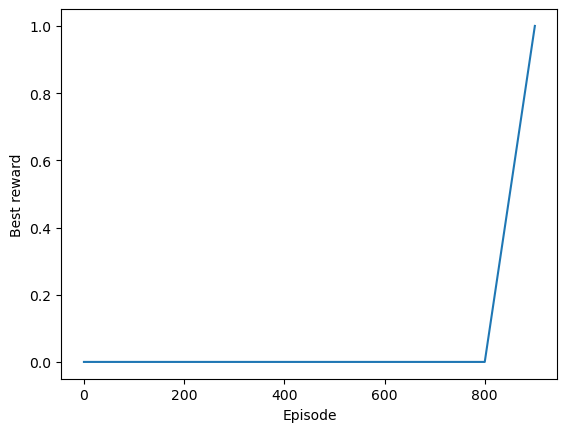

In [17]:
reward_best = -1000
total_episodes = 1000
max_steps = 100
episode_nums = []
best_tot_rewards = []

for episode in range(total_episodes):
    state = env.reset()[0]
    step = 0
    done = False
    qtable = np.random.rand(state_size, action_size) # Random Q-table

    total_reward = eval_policy(qtable,100)
    if total_reward > reward_best:
        reward_best = total_reward
        qtable_best = qtable
        print(f'Better found - reward: {reward_best}')
    if episode % 100 == 0:
        episode_nums.append(episode)
        best_tot_rewards.append(reward_best)
        print(f'Best reward after episode {episode+1} is {reward_best}')

print (f'Tot reward of the found policy: {reward_best}')
print(qtable_best)
plt.plot(episode_nums, best_tot_rewards)
plt.xlabel('Episode')
plt.ylabel('Best reward')
plt.show()

### Non-deterministic environments

It turns out that the previous evaluation method and learning algorithm does not work for non-deterministic environments.

Non-deterministic Frozen Lake

In [18]:
env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="ansi")

In [20]:
qtable = np.zeros([state_size, action_size])
# start(0) -> go right (2)
qtable[0,2] = 1
# state 1 -> go right (2)
qtable[1,2] = 1 
# state 2 -> go down (1)
qtable[2,1] = 1 
# state 6 -> go down (1)
qtable[6,1] = 1 
# state 10 -> go down (1)
qtable[10,1] = 1 
# state 14 -> go right (2) -> GOAL
qtable[14,2] = 2
print(qtable)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 0.]]


In [22]:
print(f'Total reward for manually defined Q-table: {eval_policy(qtable,100)}')

Total reward for manually defined Q-table: 0.0


Our manually defined table gave the total reward of 1.0, but now we seem to get 0.0. What happened?

### Monte Carlo evaluation

Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle.

 * https://en.wikipedia.org/wiki/Monte_Carlo_method
 
The non-deterministic environment of the Frozen Lake problem could be formed in probabilistic form, but for that we would need to know the probabilities of different states given differect actions and, in general, those probabilities are not available.

Evaluation function 2

For non-deterministic environments we need to define some number of test episodes over which the total reward is averaged

In [23]:
def eval_policy(qtable_, num_of_episodes_, max_steps_):
    rewards = []

    for episode in range(num_of_episodes_): # This is out loop over num of episodes
        state = env.reset()[0]
        total_reward = 0

        for step in range(max_steps_):
            action = np.argmax(qtable_[state,:])
            new_state, reward, done, truncated, info = env.step(action)
            total_reward += reward
            if done:
                break
            else:
                state = new_state
        rewards.append(total_reward)
        env.close()
    return sum(rewards)/num_of_episodes_

Test the new evaluation function with non-deterministic environment

In [30]:
print(f'Total reward for manually defined Q-table: {eval_policy(qtable,500,100)}')

Total reward for manually defined Q-table: 0.03


### Algorithm 2: Brute force for non-deterministic case

Better found - reward: 0.0
Best reward after episode 1 is 0.0
Better found - reward: 0.04
Better found - reward: 0.14
Best reward after episode 101 is 0.14
Better found - reward: 0.2
Best reward after episode 201 is 0.2
Best reward after episode 301 is 0.2
Best reward after episode 401 is 0.2
Best reward after episode 501 is 0.2
Better found - reward: 0.26
Best reward after episode 601 is 0.26
Best reward after episode 701 is 0.26
Best reward after episode 801 is 0.26
Best reward after episode 901 is 0.26
Tot reward of the found policy: 0.26
[[0.86141285 0.47737658 0.50262723 0.37196136]
 [0.86647181 0.57160131 0.78102876 0.19750832]
 [0.5604102  0.02953276 0.99553843 0.33292993]
 [0.11912962 0.95854369 0.90119895 0.48184871]
 [0.96027749 0.02667618 0.87677558 0.2567853 ]
 [0.06825948 0.12450083 0.82836437 0.3034447 ]
 [0.96010338 0.87082443 0.44452849 0.46575428]
 [0.78534595 0.75691164 0.85403434 0.86126985]
 [0.1323389  0.455419   0.58627077 0.67347322]
 [0.88448489 0.11067619 0.196

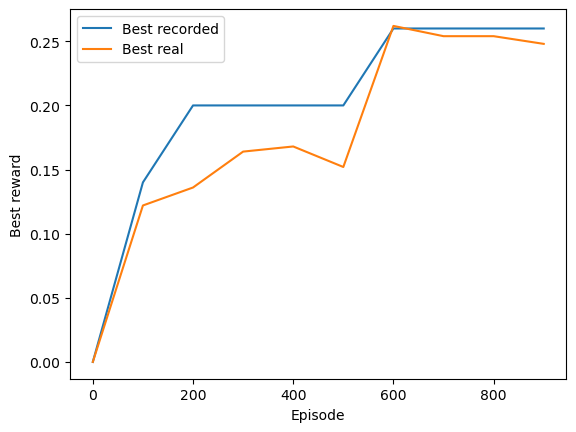

In [32]:
reward_best = -1000
total_episodes = 1000
max_steps = 100
episode_nums = []
best_tot_rewards = []
best_tot_rewards_real = []
num_of_evals = 50

for episode in range(total_episodes):
    state = env.reset()[0]
    step = 0
    done = False
    qtable = np.random.rand(state_size, action_size) # Random Q-table

    total_reward = eval_policy(qtable,num_of_evals,100) # ONLY LINE WE NEED TO CHANGE FOR NON-DET. CASE
    if total_reward > reward_best:
        reward_best = total_reward
        qtable_best = qtable
        print(f'Better found - reward: {reward_best}')
    if episode % 100 == 0:
        episode_nums.append(episode)
        best_tot_rewards_real.append(eval_policy(qtable_best,num_of_evals*10,100))
        best_tot_rewards.append(reward_best)
        print(f'Best reward after episode {episode+1} is {reward_best}')

print (f'Tot reward of the found policy: {reward_best}')
print(qtable_best)
plt.plot(episode_nums, best_tot_rewards,label='Best recorded')
plt.plot(episode_nums, best_tot_rewards_real,label='Best real')
plt.legend()
plt.xlabel('Episode')
plt.ylabel('Best reward')
plt.show()

Brute force works for the both deterministic and non-deterministic environments, but is terribly slow.

## References

R.S. Sutton and A.G. Barto (2021): Reinforcement Learning: An Introduction. 2n ed. URL: http://incompleteideas.net/book/the-book.html 